## Comparison between the attack using dts trained on a plain statistical generated dataset and on a statistical generated dataset filtering out the points "far" from the instance.

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../.."
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import HardVotingClassifier, SoftVotingClassifier, KMostSureVotingClassifier
from utils.attack_evaluation import evaluate_attack
from utils.models import load_pickle_bz2

# Loading the Adult data

In [2]:
from utils.dataloading.adult import load_adult_data, load_adult_randomforest # type: ignore

BB = load_adult_randomforest()
BB_DATA = load_adult_data()

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))
test_representatives_x = BB_DATA['X_attack_3_per_quantile']
test_representatives_y = BB_DATA['y_attack_3_per_quantile']
n_datasets = len(test_representatives_x)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8157
           1       0.79      0.61      0.69      2690

    accuracy                           0.86     10847
   macro avg       0.84      0.78      0.80     10847
weighted avg       0.86      0.86      0.86     10847



# Hard Voting

## Plain

report full
              precision    recall  f1-score   support

          in       0.70      0.09      0.16     24982
         out       0.30      0.91      0.45     10680

    accuracy                           0.33     35662
   macro avg       0.50      0.50      0.30     35662
weighted avg       0.58      0.33      0.25     35662


Class 0
              precision    recall  f1-score   support

          in       0.69      0.05      0.10     20165
         out       0.30      0.94      0.46      8663

    accuracy                           0.32     28828
   macro avg       0.50      0.50      0.28     28828
weighted avg       0.57      0.32      0.21     28828


Class 1
              precision    recall  f1-score   support

          in       0.70      0.23      0.35      4817
         out       0.29      0.77      0.43      2017

    accuracy                           0.39      6834
   macro avg       0.50      0.50      0.39      6834
weighted avg       0.58      0.39      0.37 

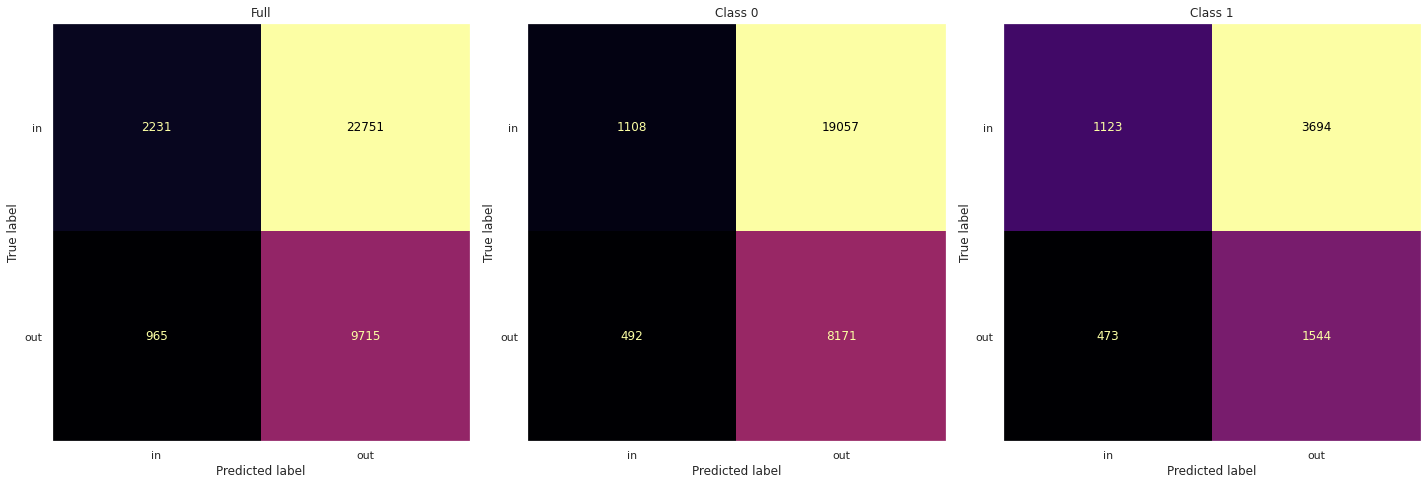

In [3]:
PLAIN_BASE_PATH = Path("../../statistical_no3std/adult/experiment_output/")
statistical_plain_0 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_plain_1 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_ens_0 = HardVotingClassifier(statistical_plain_0)
statistical_ens_1 = HardVotingClassifier(statistical_plain_1)

evaluate_attack(statistical_ens_0, statistical_ens_1, BB, BB_DATA)

## 3std

report full
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     24722
         out       0.31      0.06      0.11     10576

    accuracy                           0.68     35298
   macro avg       0.50      0.50      0.45     35298
weighted avg       0.58      0.68      0.59     35298


Class 0
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     19967
         out       0.31      0.06      0.10      8587

    accuracy                           0.68     28554
   macro avg       0.50      0.50      0.45     28554
weighted avg       0.58      0.68      0.59     28554


Class 1
              precision    recall  f1-score   support

          in       0.71      0.92      0.80      4755
         out       0.31      0.08      0.13      1989

    accuracy                           0.67      6744
   macro avg       0.51      0.50      0.47      6744
weighted avg       0.59      0.67      0.60 

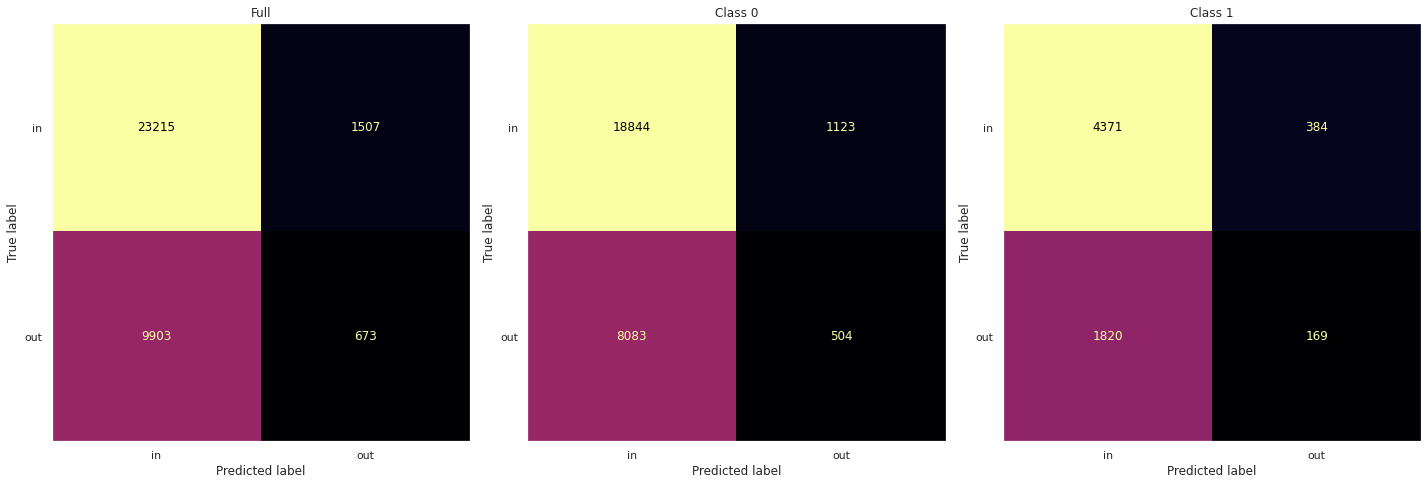

In [4]:
STD_DEV_BASE_PATH = Path("../../statistical/adult/experiment_output/")
statistical_std_dev_0 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_1 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_0 = HardVotingClassifier(statistical_std_dev_0)
statistical_std_dev_1 = HardVotingClassifier(statistical_std_dev_1)

evaluate_attack(statistical_std_dev_0, statistical_std_dev_1, BB, BB_DATA)

# Soft Voting

## Plain

report full
              precision    recall  f1-score   support

          in       0.70      0.82      0.75     25308
         out       0.30      0.18      0.22     10847

    accuracy                           0.63     36155
   macro avg       0.50      0.50      0.49     36155
weighted avg       0.58      0.63      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     20353
         out       0.30      0.06      0.11      8766

    accuracy                           0.67     29119
   macro avg       0.50      0.50      0.45     29119
weighted avg       0.58      0.67      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.33      0.45      4955
         out       0.29      0.65      0.40      2081

    accuracy                           0.43      7036
   macro avg       0.49      0.49      0.43      7036
weighted avg       0.58      0.43      0.44 

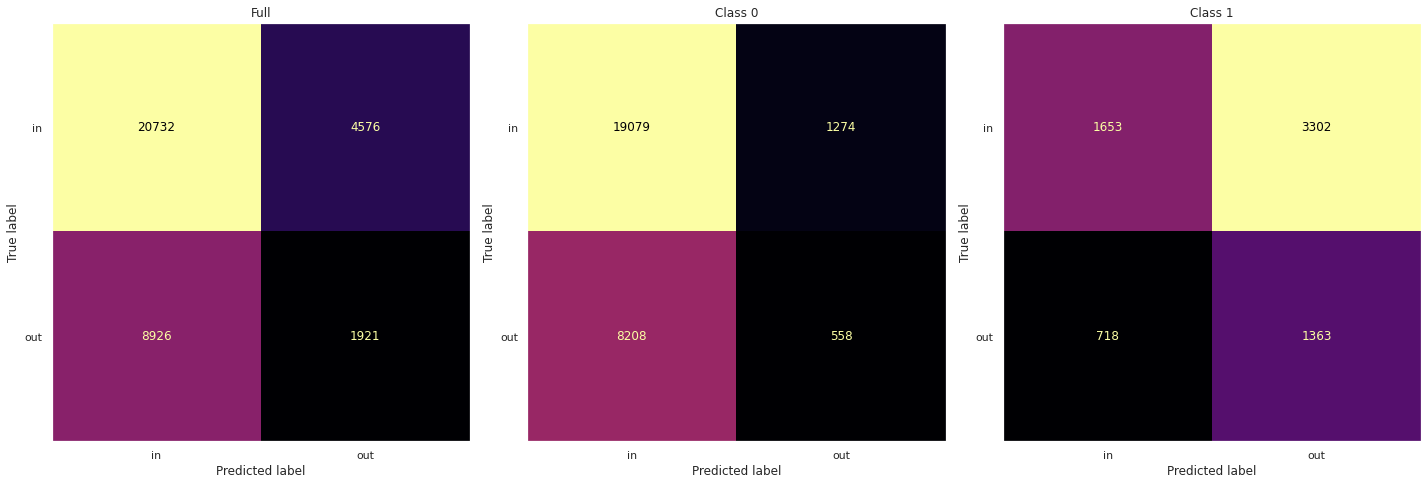

In [5]:
PLAIN_BASE_PATH = Path("../../statistical_no3std/adult/experiment_output/")
statistical_plain_0 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_plain_1 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_ens_0 = SoftVotingClassifier(statistical_plain_0)
statistical_ens_1 = SoftVotingClassifier(statistical_plain_1)

evaluate_attack(statistical_ens_0, statistical_ens_1, BB, BB_DATA)

## 3std

report full
              precision    recall  f1-score   support

          in       0.70      0.95      0.81     25308
         out       0.31      0.05      0.09     10847

    accuracy                           0.68     36155
   macro avg       0.50      0.50      0.45     36155
weighted avg       0.58      0.68      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.97      0.81     20353
         out       0.30      0.04      0.06      8766

    accuracy                           0.69     29119
   macro avg       0.50      0.50      0.44     29119
weighted avg       0.58      0.69      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.89      0.79      4955
         out       0.31      0.12      0.17      2081

    accuracy                           0.66      7036
   macro avg       0.51      0.50      0.48      7036
weighted avg       0.59      0.66      0.60 

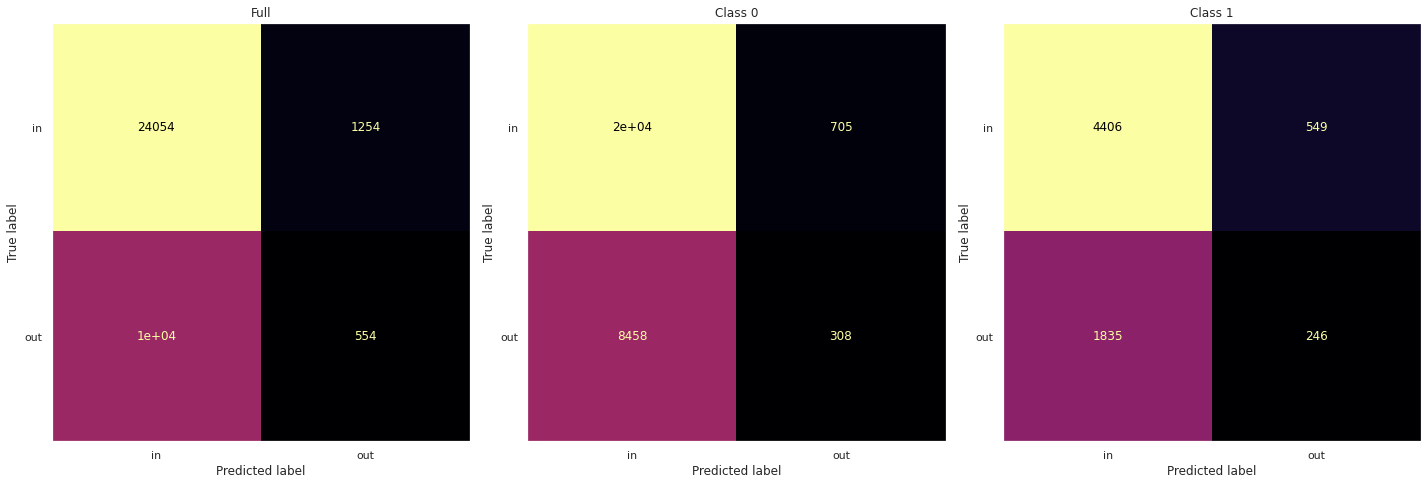

In [6]:
STD_DEV_BASE_PATH = Path("../../statistical/adult/experiment_output/")
statistical_std_dev_0 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_1 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_0 = SoftVotingClassifier(statistical_std_dev_0)
statistical_std_dev_1 = SoftVotingClassifier(statistical_std_dev_1)

evaluate_attack(statistical_std_dev_0, statistical_std_dev_1, BB, BB_DATA)

# 5MostSure Voting

## Plain

report full
              precision    recall  f1-score   support

          in       0.70      0.81      0.75     25308
         out       0.30      0.18      0.23     10847

    accuracy                           0.62     36155
   macro avg       0.50      0.50      0.49     36155
weighted avg       0.58      0.62      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     20353
         out       0.31      0.07      0.11      8766

    accuracy                           0.67     29119
   macro avg       0.51      0.50      0.46     29119
weighted avg       0.58      0.67      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.69      0.30      0.42      4955
         out       0.29      0.68      0.41      2081

    accuracy                           0.41      7036
   macro avg       0.49      0.49      0.41      7036
weighted avg       0.57      0.41      0.42 

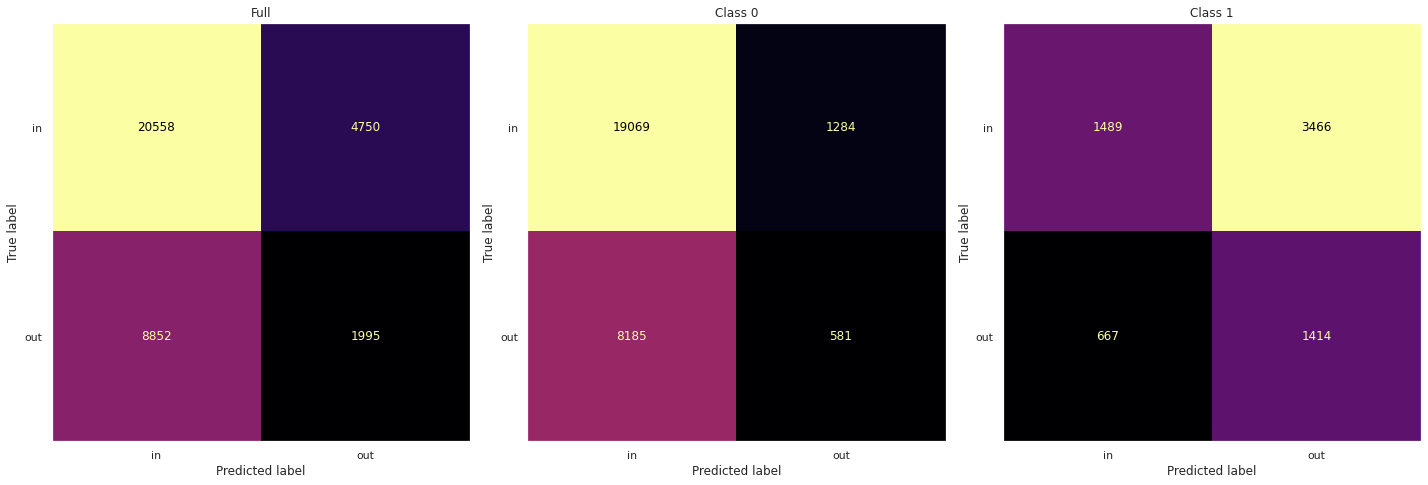

In [7]:
PLAIN_BASE_PATH = Path("../../statistical_no3std/adult/experiment_output/")
statistical_plain_0 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_plain_1 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_ens_0 = KMostSureVotingClassifier(statistical_plain_0)
statistical_ens_1 = KMostSureVotingClassifier(statistical_plain_1)

evaluate_attack(statistical_ens_0, statistical_ens_1, BB, BB_DATA)

## 3std

report full
              precision    recall  f1-score   support

          in       0.70      0.93      0.80     25308
         out       0.31      0.08      0.12     10847

    accuracy                           0.67     36155
   macro avg       0.50      0.50      0.46     36155
weighted avg       0.58      0.67      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.97      0.81     20353
         out       0.30      0.03      0.06      8766

    accuracy                           0.69     29119
   macro avg       0.50      0.50      0.44     29119
weighted avg       0.58      0.69      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.76      0.73      4955
         out       0.31      0.26      0.28      2081

    accuracy                           0.61      7036
   macro avg       0.51      0.51      0.51      7036
weighted avg       0.59      0.61      0.60 

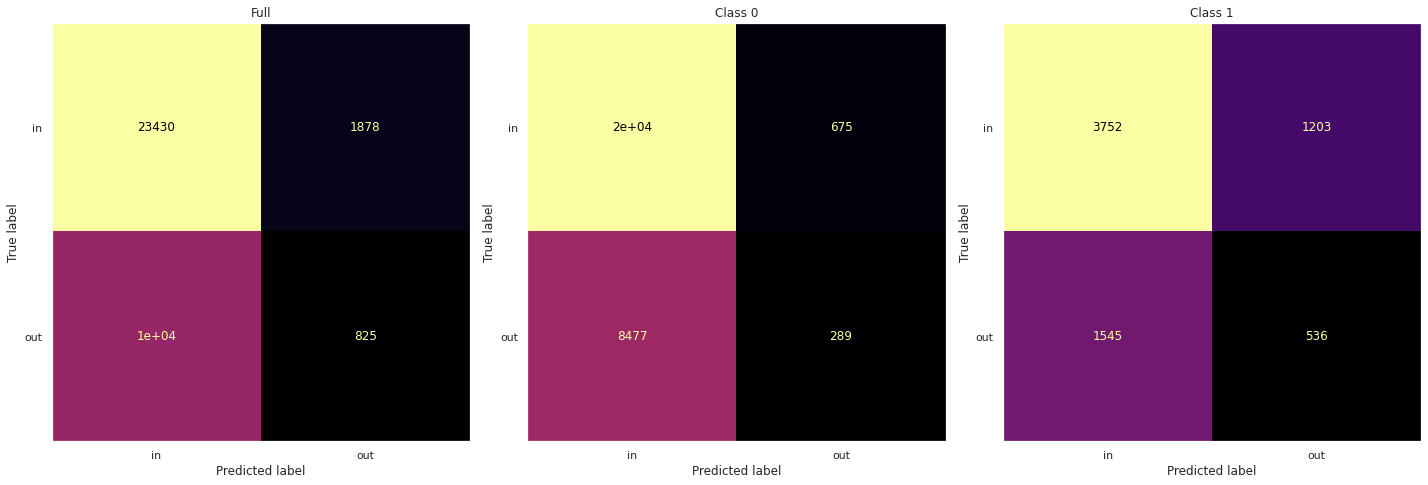

In [8]:
STD_DEV_BASE_PATH = Path("../../statistical/adult/experiment_output/")
statistical_std_dev_0 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_1 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_0 = KMostSureVotingClassifier(statistical_std_dev_0)
statistical_std_dev_1 = KMostSureVotingClassifier(statistical_std_dev_1)

evaluate_attack(statistical_std_dev_0, statistical_std_dev_1, BB, BB_DATA)